# Social Media Sentiment Analysis

In [30]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [31]:
from textblob import TextBlob
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

In [33]:
# Download stopwords (run once)
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\Kishan
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
# Load dataset (CSV)
df = pd.read_csv("Social Media Sentiments Analysis.csv")

In [36]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [37]:
# Assume text column name is 'Text'
df = df[['Text']]

# Remove duplicates & missing values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# 2. DATA CLEANING

In [38]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)    # Remove URLs
    text = re.sub(r"@\w+|#\w+", "", text)        # Remove mentions & hashtags
    text = re.sub(r"[^a-z\s]", "", text)         # Remove special characters
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text

df['Clean_Text'] = df['Text'].apply(clean_text)

# 3 SENTIMENT CLASSIFICATION


In [39]:
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Clean_Text'].apply(get_sentiment)

# 4. VISUALIZATION

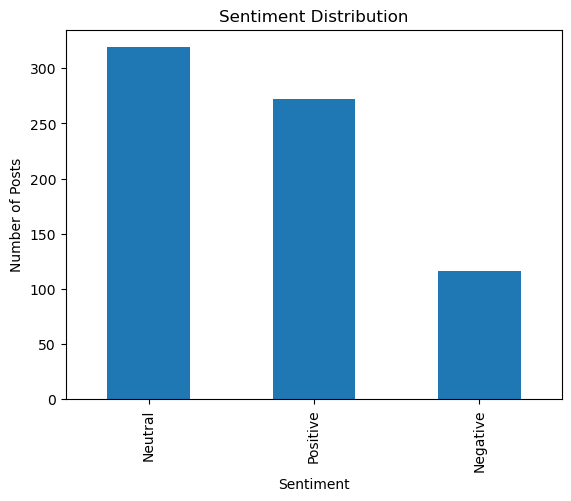

In [40]:
# 4.1 Sentiment Distribution (Bar Chart)

sentiment_counts = df['Sentiment'].value_counts()

plt.figure()
sentiment_counts.plot(kind='bar')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Posts")
plt.show()

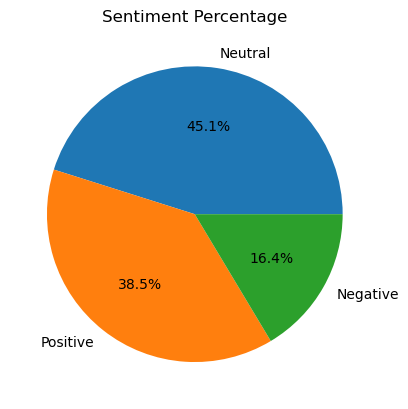

In [41]:
# ---- 4.2 Sentiment Distribution (Pie Chart)
plt.figure()
sentiment_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Sentiment Percentage")
plt.ylabel("")
plt.show()

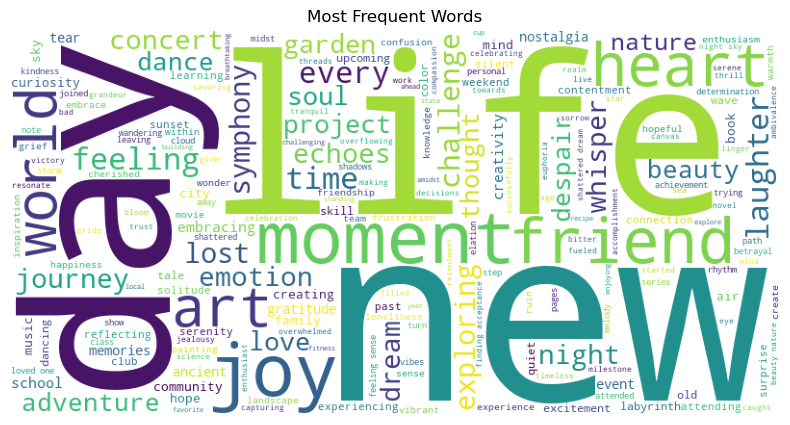

In [44]:
# ---- 4.3 Word Cloud
all_words = " ".join(df['Clean_Text'])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(all_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Most Frequent Words")
plt.show()

# 5. INSIGHTS & REPORTING

In [45]:
total_posts = len(df)
positive = sentiment_counts.get('Positive', 0)
negative = sentiment_counts.get('Negative', 0)
neutral = sentiment_counts.get('Neutral', 0)

In [48]:

print("\n SENTIMENT ANALYSIS REPORT")
print(" ")
print(f"Total Posts Analyzed : {total_posts}")
print(f"Positive Posts       : {positive}")
print(f"Negative Posts       : {negative}")
print(f"Neutral Posts        : {neutral}")

if positive > negative:
    print("\n Overall public sentiment is POSITIVE.")
    print(" Strategy: Leverage positive feedback in marketing campaigns.")
else:
    print("\ Overall public sentiment needs improvement.")
    print("📌 Strategy: Address customer complaints and improve engagement.")

print("\n Key Takeaways:")
print(" Monitor negative sentiment to reduce churn.")
print("Use trending positive keywords in promotions.")
print(" Improve customer interaction based on feedback.")


 SENTIMENT ANALYSIS REPORT
 
Total Posts Analyzed : 707
Positive Posts       : 272
Negative Posts       : 116
Neutral Posts        : 319

 Overall public sentiment is POSITIVE.
 Strategy: Leverage positive feedback in marketing campaigns.

 Key Takeaways:
 Monitor negative sentiment to reduce churn.
Use trending positive keywords in promotions.
 Improve customer interaction based on feedback.
